In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
spotify = pd.read_csv('./Data/Cleaned_SpotifyFeatures-Copy1.csv')
spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [11]:
spotify.columns

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'genre_A Capella',
       'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Children's Music', 'genre_Children’s Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#'],
      dtype='object')

In [4]:
X = spotify[['popularity', 'loudness', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [5]:
km = KMeans(n_clusters=10, random_state=2024)
km.fit(X_sc)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=2024)

In [6]:
silhouette_score(X_sc, km.labels_)

0.15165018548502004

In [8]:
rows = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=2024)
    km.fit(X_sc)
    
    inert = km.inertia_
    sil = silhouette_score(X_sc, km.labels_)
    
    rows.append((k, inert, sil))

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

In [9]:
res = pd.DataFrame(rows, columns=['k', 'inertia', 'sil'])
res.head()

,k,inertia,sil
0,2,1.775740e+06,0.276513
1,3,1.513339e+06,0.305901
2,4,1.372815e+06,0.181236
3,5,1.280418e+06,0.169070
4,6,1.214378e+06,0.151751


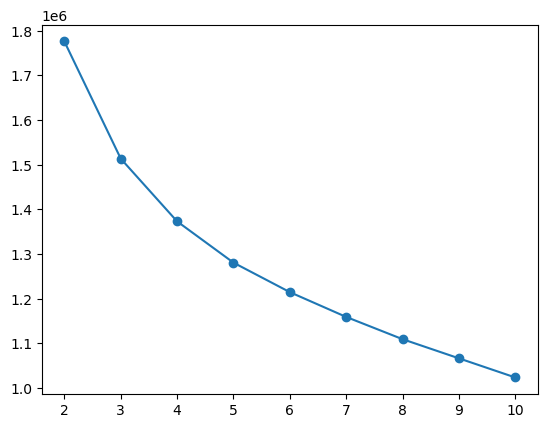

In [10]:
plt.plot(res.k, res.inertia, marker='o');

In [12]:
X2 = spotify[['genre_A Capella',
       'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Children\'s Music', 'genre_Children’s Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World']]


sc = StandardScaler()
X2_sc = sc.fit_transform(X2)
km2 = KMeans(n_clusters=10, random_state=2024)
km2.fit(X2_sc)
silhouette_score(X2_sc, km2.labels_)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3392608838889264